<a href="https://colab.research.google.com/github/minhnhat-1504/THTTNT/blob/main/BaoCao_THTTNT_Buoi04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 align="center"><font color="Green">BÁO CÁO THỰC HÀNH MÔN TRÍ TUỆ NHÂN TẠO</font></h1>**
<h3>TUẦN 4 - CÁC PHƯƠNG PHÁP GIẢI BÀI TOÁN THỎA MÃN RÀNG BUỘC</h3>
<h3>CHỦ ĐỀ: TÔ MÀU ĐỒ THỊ</h3>



**Họ và tên:** Lê Hoàng Minh Nhật <br>
**MSSV:** 2001230611



**TÔ MÀU ĐỒ THỊ ĐỌC TỪ FILE TEXT**

In [1]:
# Lệnh ghi file input một ma trận kề cho bài toán tô màu đồ thị
%%writefile input_graph.txt
0 1 1 0 1 0
1 0 1 1 0 1
1 1 0 1 1 0
0 1 1 0 0 1
1 0 1 0 0 1
0 1 0 1 1 0

Writing input_graph.txt


In [4]:
import networkx as nx
import matplotlib.pyplot as plt


def loadGraph(filename):
    """
    Đọc file cấu trúc đồ thị và trả về ma trận kề dưới dạng array(list).

    Tham số nhận vào:
    ----------
    filename : str
        Tên file .txt chứa ma trận kề (các số cách nhau bởi khoảng trắng).

    Đầu ra (Trả về):
    ----------
    list
        Một danh sách lồng (list of lists) biểu diễn ma trận kề.
    """
    matrix = []
    try:
        with open(filename, 'r') as f:
            for line in f:
                # Chuyển đổi dòng văn bản thành list các số nguyên
                row = [int(x) for x in line.strip().split()]
                matrix.append(row)
        return matrix
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file {filename}")
        return []

class GraphColoring:
    """
    Lớp xử lý bài toán tô màu đồ thị.
    """

    def __init__(self, adjacency_matrix):
        self.G_matrix = adjacency_matrix
        self.num_vertices = len(adjacency_matrix)
        self.node_names = [chr(65 + i) for i in range(self.num_vertices)]
        self.colors_solution = {}

        # Bảng màu (Palette)
        self.palette = [
            'Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Purple', 'Cyan', 'Gray'
        ]

        # Tạo đồ thị NetworkX
        self.G_nx = nx.Graph()
        for i in range(self.num_vertices):
            node_name = self.node_names[i]
            self.G_nx.add_node(node_name)
            for j in range(i + 1, self.num_vertices):
                if self.G_matrix[i][j] == 1:
                    self.G_nx.add_edge(node_name, self.node_names[j])

        # Cố định vị trí các đỉnh (layout) để hình không bị nhảy khi vẽ lại
        self.pos = nx.spring_layout(self.G_nx, seed=42)

    def visualize_step(self, step_number, current_node_idx=None):
        """
        Hàm vẽ trạng thái hiện tại của đồ thị.

        Tham số:
            step_number: Số thứ tự bước.
            current_node_idx: Index của đỉnh đang được xử lý (để làm nổi bật).
        """
        plt.figure(figsize=(6, 4))

        # Tạo danh sách màu cho tất cả các đỉnh
        # Nếu đỉnh chưa có trong solution -> tô màu xám nhạt (lightgray)
        # Nếu đã có -> tô màu đã gán
        node_colors = []
        for name in self.G_nx.nodes():
            if name in self.colors_solution:
                node_colors.append(self.colors_solution[name])
            else:
                node_colors.append('lightgray') # Màu mặc định chưa tô

        # Vẽ đồ thị
        nx.draw(self.G_nx, self.pos,
                node_color=node_colors,
                with_labels=True,
                node_size=1500,
                font_weight='bold',
                font_color='black',
                edge_color='gray')

        # Nếu có đỉnh đang xử lý, vẽ viền đậm hoặc tiêu đề rõ hơn
        title = f"Bước {step_number}"
        if current_node_idx is not None:
            node_name = self.node_names[current_node_idx]
            title += f": Đang chọn đỉnh {node_name} (Bậc cao nhất)"
            # Vẽ viền đỏ quanh đỉnh đang chọn (tùy chọn nâng cao)
            nx.draw_networkx_nodes(self.G_nx, self.pos, nodelist=[node_name], node_size=1500, edgecolors='black', linewidths=2, node_color=self.colors_solution.get(node_name, 'lightgray'))

        plt.title(title)
        plt.show()

    def solve(self):
        """
        Thực hiện thuật toán và vẽ hình sau mỗi bước.
        """
        current_degrees = []
        for i in range(self.num_vertices):
            current_degrees.append(sum(self.G_matrix[i]))

        colored_status = [False] * self.num_vertices
        count_colored = 0

        print(f"--- BẮT ĐẦU ---")

        # Vẽ trạng thái ban đầu (chưa tô màu gì)
        print("Trạng thái ban đầu:")
        self.visualize_step(0)

        # LẶP
        while count_colored < self.num_vertices:

            # --- BƯỚC 1: Chọn đỉnh ---
            max_degree = -1
            u = -1
            for i in range(self.num_vertices):
                if not colored_status[i]:
                    if current_degrees[i] > max_degree:
                        max_degree = current_degrees[i]
                        u = i

            if u == -1: break

            # --- TÔ MÀU ---
            forbidden_colors = set()
            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and colored_status[v]:
                    neighbor_color = self.colors_solution[self.node_names[v]]
                    forbidden_colors.add(neighbor_color)

            color_idx = 0
            while self.palette[color_idx] in forbidden_colors:
                color_idx += 1

            assigned_color = self.palette[color_idx]
            self.colors_solution[self.node_names[u]] = assigned_color
            colored_status[u] = True
            count_colored += 1

            # --- VẼ HÌNH NGAY SAU KHI TÔ MÀU ---
            print(f"-> Đã tô đỉnh {self.node_names[u]} màu {assigned_color}")
            self.visualize_step(count_colored, u)

            # --- BƯỚC 2: HẠ BẬC ---
            current_degrees[u] = 0
            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and not colored_status[v]:
                    current_degrees[v] = current_degrees[v] - 1

        return self.colors_solution

    def visualize(self):
        # Hàm này để vẽ kết quả cuối cùng
        self.visualize_step("HOÀN THÀNH")

--- Đang đọc dữ liệu từ /content/input_graph.txt ---
Ma trận kề (Array List):
[0, 1, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 1]
[1, 1, 0, 1, 1, 0]
[0, 1, 1, 0, 0, 1]
[1, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 1, 0]
------------------------------
--- Đang thực hiện thuật toán ---
--- BẮT ĐẦU ---
Trạng thái ban đầu:


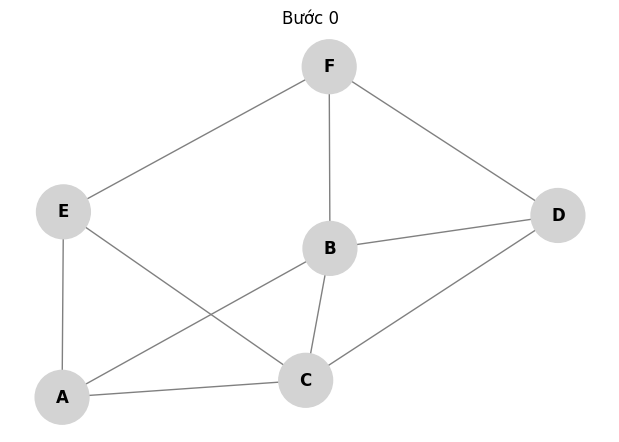

-> Đã tô đỉnh B màu Red


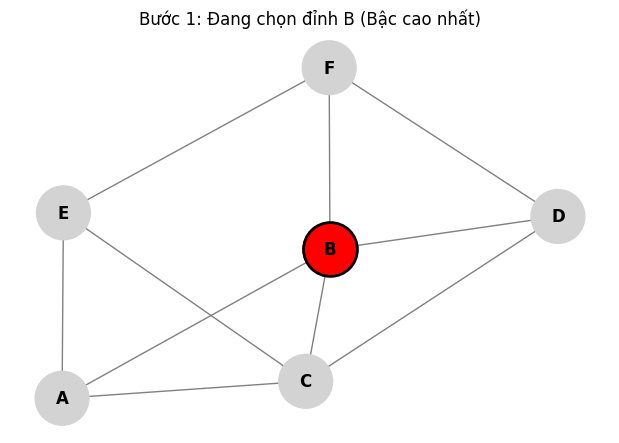

-> Đã tô đỉnh C màu Green


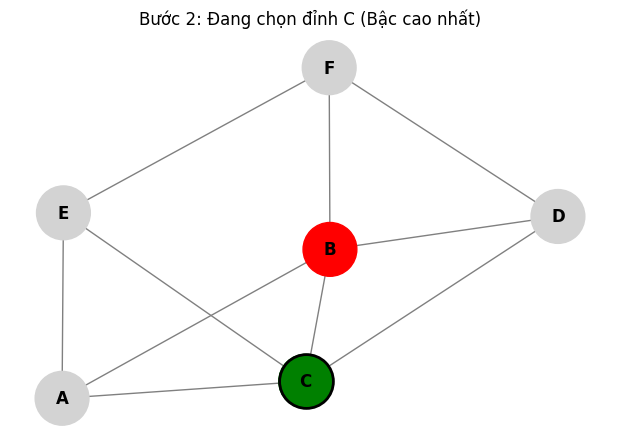

-> Đã tô đỉnh E màu Red


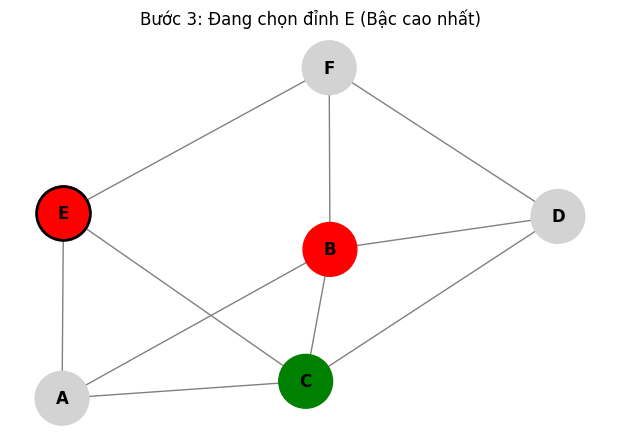

-> Đã tô đỉnh D màu Blue


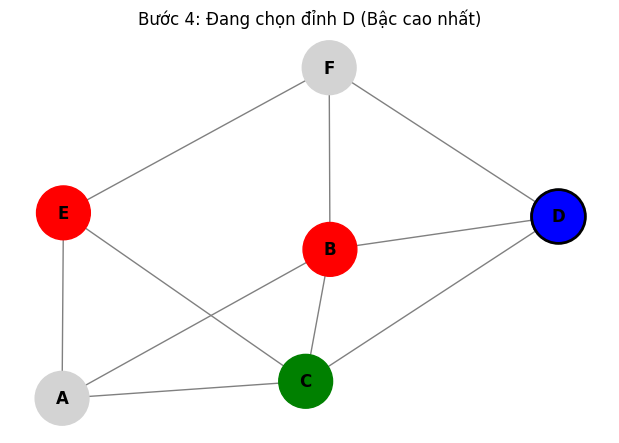

-> Đã tô đỉnh A màu Blue


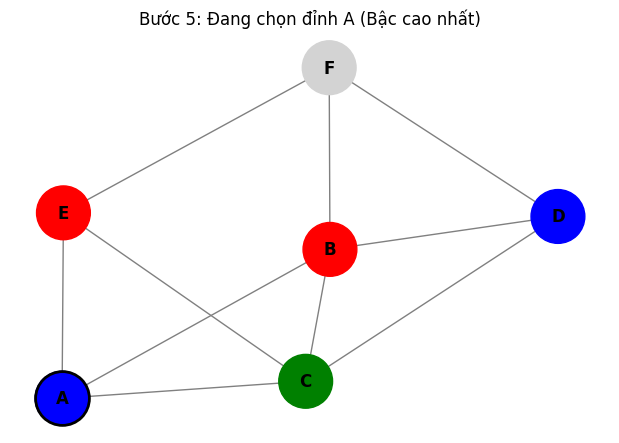

-> Đã tô đỉnh F màu Green


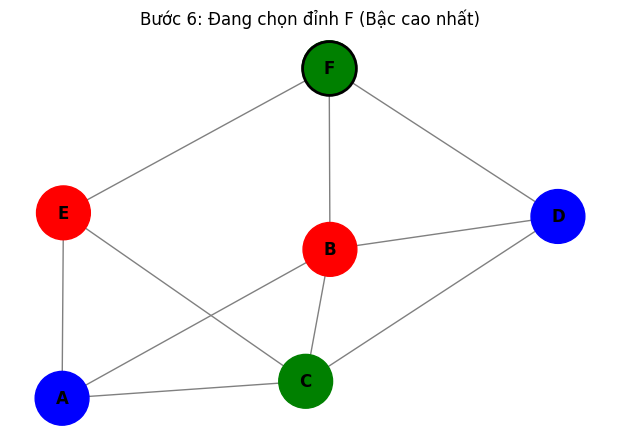

Kết quả tô màu:
Đỉnh A: Blue
Đỉnh B: Red
Đỉnh C: Green
Đỉnh D: Blue
Đỉnh E: Red
Đỉnh F: Green
------------------------------


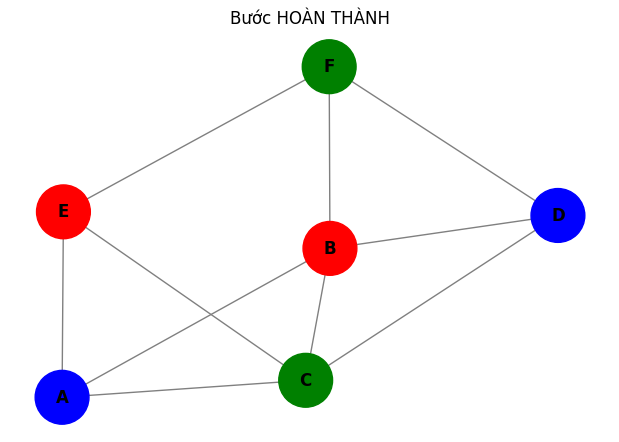

In [5]:
# 1. Tên file đầu vào
input_filename = '/content/input_graph.txt'

# 2. Gọi hàm loadGraph (trả về array/list)
print(f"--- Đang đọc dữ liệu từ {input_filename} ---")
adj_list = loadGraph(input_filename)

if len(adj_list) > 0:
    print("Ma trận kề (Array List):")
    for row in adj_list:
        print(row)
    print("-" * 30)

    # 3. Khởi tạo đối tượng
    graph_app = GraphColoring(adj_list)

    # 4. Giải quyết bài toán
    print("--- Đang thực hiện thuật toán ---")
    result = graph_app.solve()

    # In kết quả
    print("Kết quả tô màu:")
    for node in sorted(result.keys()):
        print(f"Đỉnh {node}: {result[node]}")

    # 5. Hiển thị
    print("-" * 30)
    graph_app.visualize()
else:
    print("Không thể chạy chương trình do lỗi file.")

**TÔ MÀU ĐỒ THỊ SINH NGẪU NHIÊN**

In [6]:
import random
import os

# HÀM SINH MA TRẬN NGẪU NHIÊN
def generate_random_graph_file(num_vertices, filename='random_graph.txt'):
    """
    Sinh ma trận kề ngẫu nhiên cho đồ thị vô hướng và lưu vào file.

    Tham số:
        num_vertices (int): Số lượng đỉnh người dùng muốn.
        filename (str): Tên file để lưu.
    """
    # Khởi tạo ma trận toàn số 0
    matrix = [[0] * num_vertices for _ in range(num_vertices)]
    """
    # Duyệt qua từng cặp đỉnh để gán cạnh ngẫu nhiên,
      chỉ duyệt tam giác trên (i < j) để đảm bảo tính đối xứng
    """
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            # Tỉ lệ xuất hiện cạnh (random 0 hoặc 1)
            edge_exists = random.choice([0, 1])
            matrix[i][j] = edge_exists
            matrix[j][i] = edge_exists # Đối xứng qua đường chéo chính

    # Ghi ma trận vào file .txt
    with open(filename, 'w') as f:
        for row in matrix:
            # Chuyển list số thành chuỗi: [0, 1] -> "0 1"
            line = " ".join(map(str, row))
            f.write(line + "\n")

    print(f"Đã sinh ngẫu nhiên đồ thị {num_vertices} đỉnh và lưu vào '{filename}'.")

def loadGraph(filename):
    """
    Đọc file .txt và trả về ma trận kề dạng array(list).
    """
    matrix = []
    try:
        with open(filename, 'r') as f:
            for line in f:
                row = [int(x) for x in line.strip().split()]
                matrix.append(row)
        return matrix
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file {filename}")
        return []

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphColoring:
    """
    Lớp xử lý tô màu đồ thị:
    - Thuật toán hạ bậc sau mỗi lần tô.
    """

    def __init__(self, adjacency_matrix):
        """
        Khởi tạo và thiết lập thông số đồ họa.
        """
        self.G_matrix = adjacency_matrix
        self.num_vertices = len(adjacency_matrix)
        # Tạo tên đỉnh A, B, C... hoặc A1, A2 nếu quá nhiều đỉnh
        if self.num_vertices <= 26:
            self.node_names = [chr(65 + i) for i in range(self.num_vertices)]
        else:
            self.node_names = [f"V{i}" for i in range(self.num_vertices)]

        self.colors_solution = {}

        # Bảng màu
        self.palette = [
            'Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Purple', 'Cyan',
            'Pink', 'Brown', 'Gray', 'Olive', 'Teal'
        ]

        self.G_nx = nx.Graph()
        for i in range(self.num_vertices):
            node_name = self.node_names[i]
            self.G_nx.add_node(node_name)
            for j in range(i + 1, self.num_vertices):
                if self.G_matrix[i][j] == 1:
                    self.G_nx.add_edge(node_name, self.node_names[j])

        # Cố định vị trí các đỉnh để hình không bị thay đổi khi vẽ lại
        self.pos = nx.spring_layout(self.G_nx, seed=100, k=0.8)

    def visualize_step(self, step_count, current_node_idx=None):
        """
        Hàm vẽ trạng thái hiện tại của đồ thị lên màn hình.
        """
        plt.figure(figsize=(6, 5))

        # Tạo danh sách màu: Đỉnh nào chưa tô thì màu yrắng (viền đen)
        node_colors = []
        for name in self.G_nx.nodes():
            if name in self.colors_solution:
                node_colors.append(self.colors_solution[name])
            else:
                node_colors.append('whitesmoke')

        # Vẽ cạnh
        nx.draw_networkx_edges(self.G_nx, self.pos, edge_color='gray', alpha=0.5)

        # Vẽ đỉnh
        nx.draw_networkx_nodes(self.G_nx, self.pos, node_color=node_colors, node_size=800, edgecolors='black')

        # Vẽ nhãn (Tên đỉnh)
        nx.draw_networkx_labels(self.G_nx, self.pos, font_size=10, font_weight='bold')

        # Tiêu đề
        title = f"Bước {step_count}"
        if current_node_idx is not None:
            node_name = self.node_names[current_node_idx]
            title += f": Đang chọn đỉnh {node_name} (Bậc cao nhất)"
            # Làm nổi bật đỉnh đang chọn bằng viền đỏ dày
            nx.draw_networkx_nodes(self.G_nx, self.pos, nodelist=[node_name],
                                   node_size=800, node_color=self.colors_solution[node_name],
                                   edgecolors='red', linewidths=3)

        plt.title(title)
        plt.axis('off')
        plt.show()

    def solve(self):
        """
        Thực hiện thuật toán tô màu.
        """
        # Tính bậc ban đầu
        current_degrees = [sum(self.G_matrix[i]) for i in range(self.num_vertices)]
        colored_status = [False] * self.num_vertices
        count_colored = 0

        print("--- TRẠNG THÁI BAN ĐẦU ---")
        self.visualize_step(0)

        # LẶP
        while count_colored < self.num_vertices:

            # --- BƯỚC 1: Chọn đỉnh có bậc lớn nhất (trong các đỉnh chưa tô) ---
            max_degree = -999
            u = -1
            for i in range(self.num_vertices):
                if not colored_status[i]:
                    if current_degrees[i] > max_degree:
                        max_degree = current_degrees[i]
                        u = i

            if u == -1: break

            # --- TÔ MÀU ---
            # Tìm các màu bị cấm (màu của hàng xóm đã tô)
            forbidden_colors = set()
            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and colored_status[v]:
                    neighbor_name = self.node_names[v]
                    forbidden_colors.add(self.colors_solution[neighbor_name])

            # Chọn màu hợp lệ đầu tiên
            color_idx = 0
            while color_idx < len(self.palette) and self.palette[color_idx] in forbidden_colors:
                color_idx += 1

            # Nếu hết màu trong bảng màu, dùng màu đen (fallback)
            if color_idx < len(self.palette):
                assigned_color = self.palette[color_idx]
            else:
                assigned_color = 'black'

            self.colors_solution[self.node_names[u]] = assigned_color
            colored_status[u] = True
            count_colored += 1

            # --- HIỂN THỊ HÌNH ẢNH  ---
            print(f"-> Đã chọn đỉnh {self.node_names[u]} (Bậc {max_degree}), tô màu {assigned_color}")
            self.visualize_step(count_colored, u)

            # --- BƯỚC 2: HẠ BẬC ---
            # 1. Đỉnh đã tô màu: bậc = 0
            current_degrees[u] = -1

            # 2. Những đỉnh kề chưa tô: giảm bậc đi 1
            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and not colored_status[v]:
                    current_degrees[v] = current_degrees[v] - 1

        return self.colors_solution

=== CHƯƠNG TRÌNH TÔ MÀU ĐỒ THỊ NGẪU NHIÊN ===
Nhập số lượng đỉnh (Khuyên dùng 5-10 để dễ nhìn): 10

1. Đang sinh ma trận ngẫu nhiên...
Đã sinh ngẫu nhiên đồ thị 10 đỉnh và lưu vào 'random_graph.txt'.
2. Đang đọc lại dữ liệu từ file...
   Ma trận kề:
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 1]
    [0, 0, 0, 1, 0, 1, 0, 0, 1, 1]
    [0, 0, 1, 1, 1, 0, 1, 0, 0, 1]
    [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]
    [0, 1, 1, 0, 0, 0, 1, 0, 0, 0]
    [1, 0, 1, 0, 1, 0, 1, 0, 0, 0]
    [0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

3. Bắt đầu thuật toán tô màu và vẽ hình...
--- TRẠNG THÁI BAN ĐẦU ---


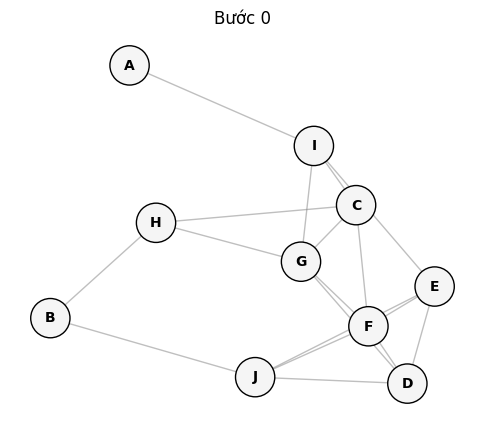

-> Đã chọn đỉnh F (Bậc 5), tô màu Red


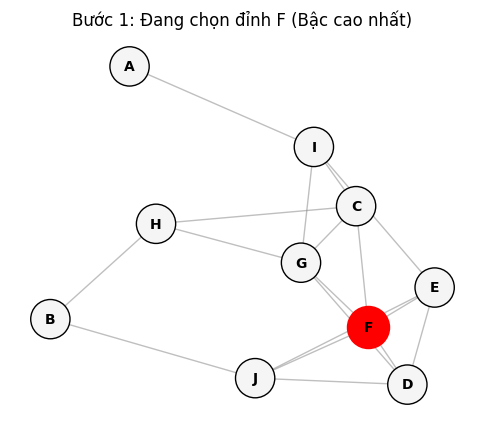

-> Đã chọn đỉnh G (Bậc 4), tô màu Green


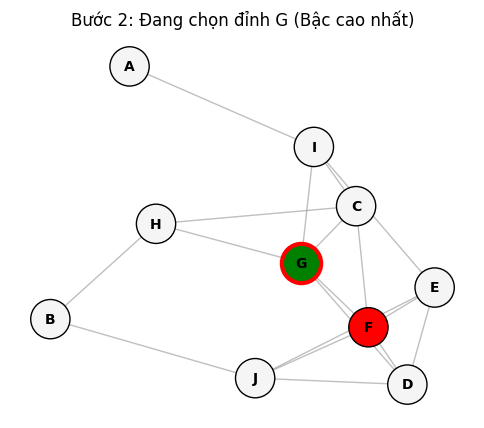

-> Đã chọn đỉnh E (Bậc 3), tô màu Green


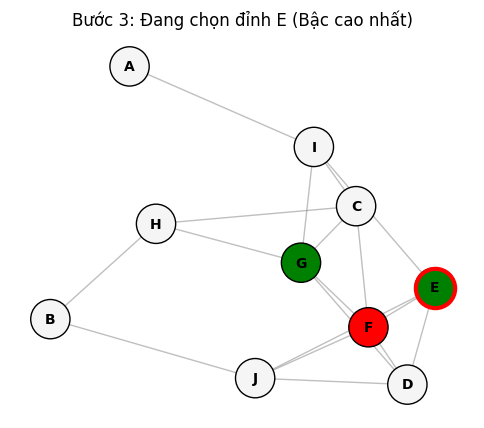

-> Đã chọn đỉnh B (Bậc 2), tô màu Red


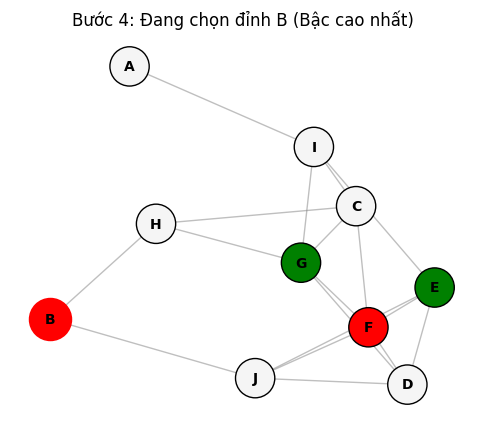

-> Đã chọn đỉnh C (Bậc 2), tô màu Blue


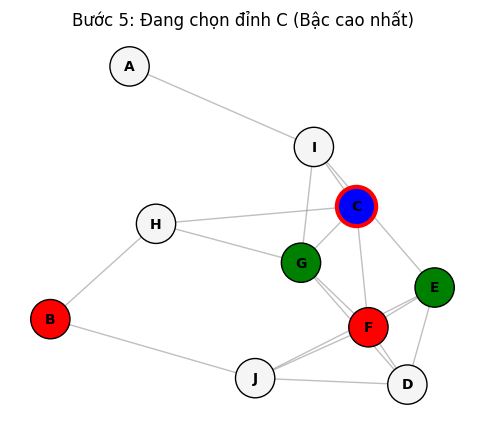

-> Đã chọn đỉnh A (Bậc 1), tô màu Red


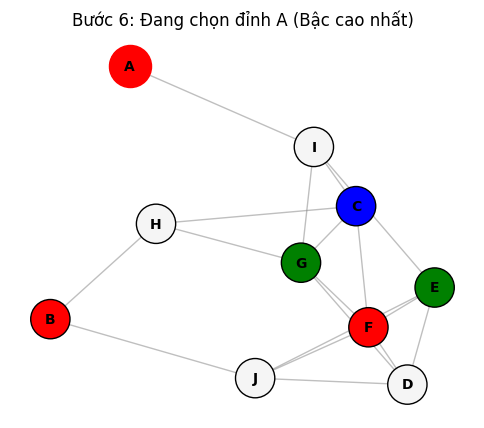

-> Đã chọn đỉnh D (Bậc 1), tô màu Blue


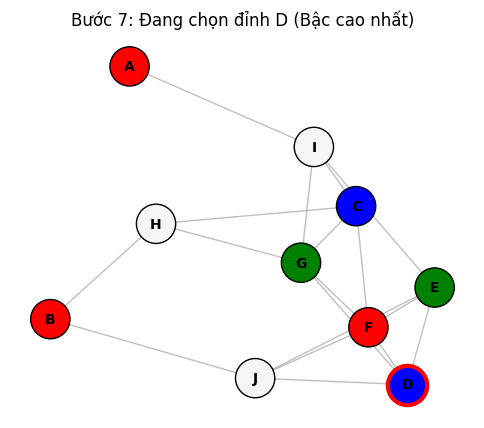

-> Đã chọn đỉnh H (Bậc 0), tô màu Yellow


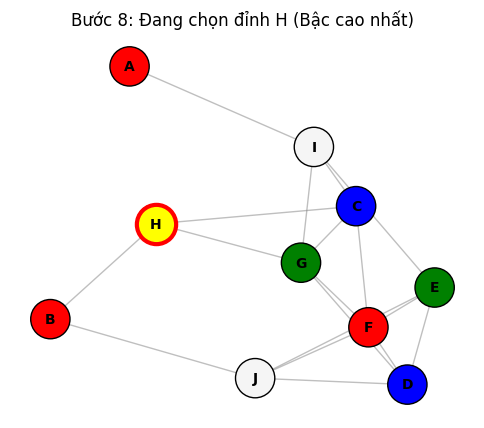

-> Đã chọn đỉnh I (Bậc 0), tô màu Yellow


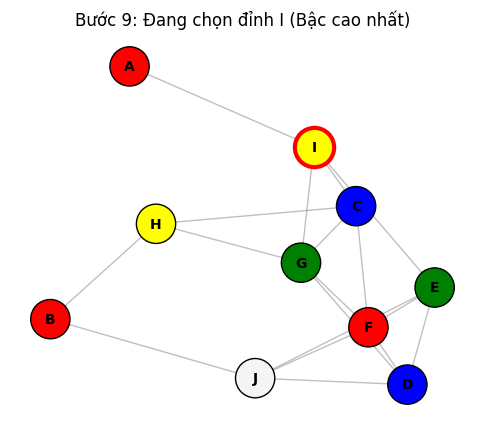

-> Đã chọn đỉnh J (Bậc 0), tô màu Yellow


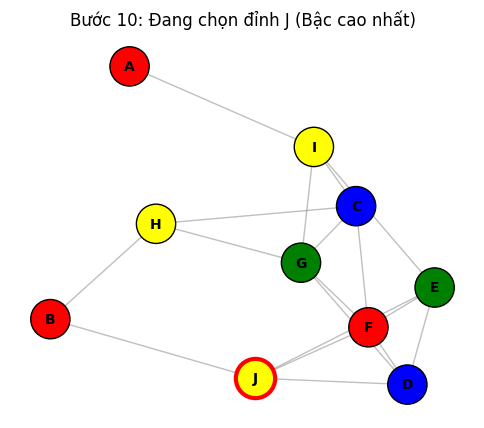


=== KẾT QUẢ CUỐI CÙNG ===
Tổng số màu sử dụng: 4
Đỉnh A: Red
Đỉnh B: Red
Đỉnh C: Blue
Đỉnh D: Blue
Đỉnh E: Green
Đỉnh F: Red
Đỉnh G: Green
Đỉnh H: Yellow
Đỉnh I: Yellow
Đỉnh J: Yellow


In [8]:
print("=== CHƯƠNG TRÌNH TÔ MÀU ĐỒ THỊ NGẪU NHIÊN ===")

# 1. Nhập liệu
try:
    n_input = input("Nhập số lượng đỉnh (Khuyên dùng 5-10 để dễ nhìn): ")
    n = int(n_input)

    if n <= 0:
        print("Vui lòng nhập số nguyên dương > 0")
    else:
        filename = 'random_graph.txt'

        # 2. Sinh dữ liệu và ghi vào file
        print("\n1. Đang sinh ma trận ngẫu nhiên...")
        generate_random_graph_file(n, filename)

        # 3. Đọc dữ liệu từ file (theo yêu cầu đề bài)
        print("2. Đang đọc lại dữ liệu từ file...")
        adj_list = loadGraph(filename)

        # In ma trận ra màn hình (nếu nhỏ)
        if n <= 20:
            print("   Ma trận kề:")
            for row in adj_list:
                print("   ", row)

        # 4. Khởi chạy thuật toán
        print("\n3. Bắt đầu thuật toán tô màu và vẽ hình...")
        app = GraphColoring(adj_list)
        results = app.solve()

        # 5. Kết luận
        print("\n=== KẾT QUẢ CUỐI CÙNG ===")
        print(f"Tổng số màu sử dụng: {len(set(results.values()))}")
        for node in sorted(results.keys()):
            print(f"Đỉnh {node}: {results[node]}")

except ValueError:
    print("Lỗi: Vui lòng nhập một số nguyên hợp lệ.")